In [1]:
!pip install statsmodels
!pip install sklearn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\weika\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [2]:
# Load the dataset
df_clean = pd.read_csv("Data.csv")  

# Clean column names by removing potential hidden characters
df_clean.columns = df_clean.columns.str.strip()  
df_clean.columns = df_clean.columns.str.replace(r'\xa0', '', regex=True)  

# Standardize data types (using safe access)
df_clean["SalaryUSD"] = df_clean.get("SalaryUSD", pd.Series(dtype='float64')).replace(",", "", regex=True).astype(float)  
df_clean["YearsWithThisTypeOfJob"] = pd.to_numeric(df_clean.get("YearsWithThisTypeOfJob", pd.Series(dtype='float64')), errors="coerce")  
df_clean["OtherPeopleOnYourTeam"] = pd.to_numeric(df_clean.get("OtherPeopleOnYourTeam", pd.Series(dtype='float64')), errors="coerce")  
df_clean[df_clean["Gender"].isin(["Male", "Female"])]
df_clean = df_clean[~df_clean["EmploymentSector"].isin(["Student"])]
# Drop specified columns (using a safe method)
columns_to_drop = [  
    "PostalCode", "PrimaryDatabase", "YearsWithThisDatabase",  
    "OtherDatabases", "DatabaseServers", "Counter"  
]  
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns], errors="ignore")  
# Reset index
df_clean.reset_index(drop=True, inplace=True)  

# Save the cleaned data
df_clean.to_csv("cleaned_data.csv", index=False)  

# Check information about the cleaned dataset
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13833 entries, 0 to 13832
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Survey Year                           13833 non-null  int64  
 1   Timestamp                             13833 non-null  object 
 2   SalaryUSD                             13833 non-null  float64
 3   Country                               13833 non-null  object 
 4   EmploymentStatus                      13833 non-null  object 
 5   JobTitle                              13833 non-null  object 
 6   ManageStaff                           13833 non-null  object 
 7   YearsWithThisTypeOfJob                13833 non-null  int64  
 8   HowManyCompanies                      13833 non-null  object 
 9   OtherPeopleOnYourTeam                 7109 non-null   float64
 10  PopulationOfLargestCityWithin20Miles  13833 non-null  object 
 11  EmploymentSecto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13833 entries, 0 to 13832
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Survey Year                           13833 non-null  int64  
 1   Timestamp                             13833 non-null  object 
 2   SalaryUSD                             13833 non-null  float64
 3   Country                               13833 non-null  object 
 4   EmploymentStatus                      13833 non-null  object 
 5   JobTitle                              13833 non-null  object 
 6   ManageStaff                           13833 non-null  object 
 7   YearsWithThisTypeOfJob                13833 non-null  int64  
 8   HowManyCompanies                      13833 non-null  object 
 9   OtherPeopleOnYourTeam                 7109 non-null   float64
 10  PopulationOfLargestCityWithin20Miles  13833 non-null  object 
 11  EmploymentSecto

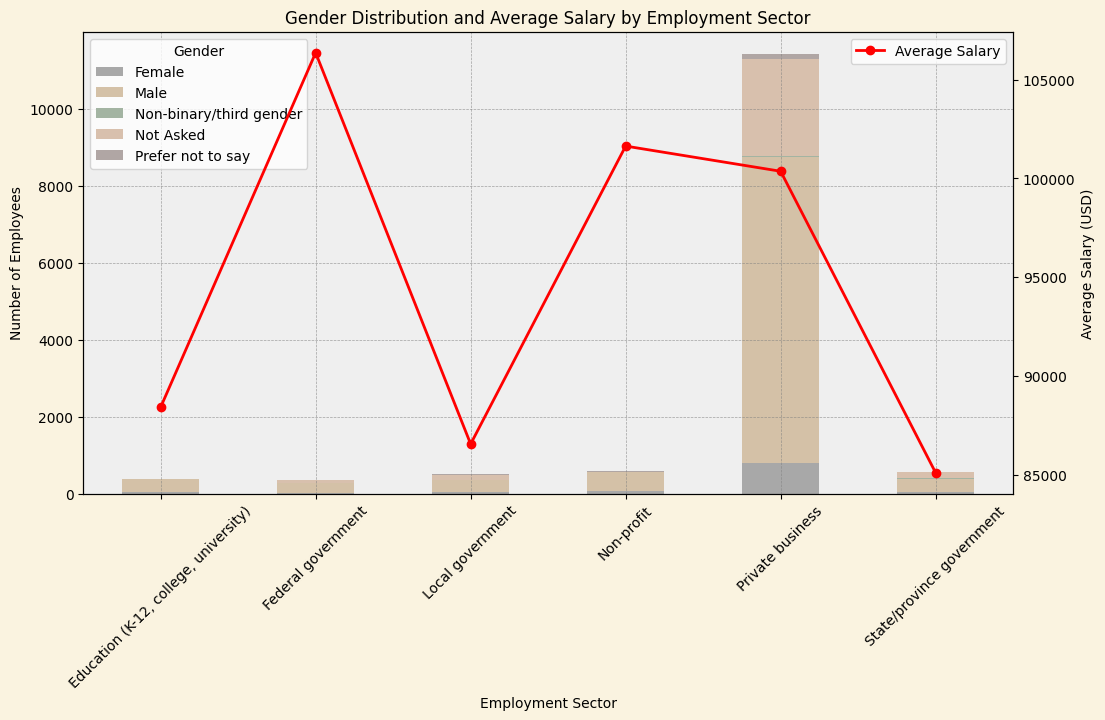

In [3]:
# Set the background color for all subsequent plots
plt.rcParams["figure.facecolor"] = "#FAF3E0"  

# Display dataset information
df_clean.info()

# Compute the average salary for each Employment Sector
sector_avg_salary = df_clean.groupby("EmploymentSector")["SalaryUSD"].mean()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart (Gender distribution)
sector_gender_counts = df_clean.groupby(["EmploymentSector", "Gender"]).size().unstack()
sector_gender_counts.plot(kind="bar", stacked=True, ax=ax1, 
                          color=["#A8A8A8", "#D4C1A7", "#A3B4A2", "#D8C0AD", "#B0A6A4"])

# Set labels and title
ax1.set_xlabel("Employment Sector")
ax1.set_ylabel("Number of Employees")
ax1.set_title("Gender Distribution and Average Salary by Employment Sector")
ax1.tick_params(axis="x", rotation=45)
ax1.legend(title="Gender")

# Create a secondary y-axis to plot the average salary line chart
ax2 = ax1.twinx()
ax2.plot(sector_avg_salary.index, sector_avg_salary.values, marker="o", linestyle="-", 
         color="red", linewidth=2, label="Average Salary")
ax2.set_ylabel("Average Salary (USD)")

# Add grid and background color
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.set_facecolor("#EFEFEF")

# Add a legend for the second axis
ax2.legend(loc="upper right")

# Display the plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13833 entries, 0 to 13832
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Survey Year                           13833 non-null  int64  
 1   Timestamp                             13833 non-null  object 
 2   SalaryUSD                             13833 non-null  float64
 3   Country                               13833 non-null  object 
 4   EmploymentStatus                      13833 non-null  object 
 5   JobTitle                              13833 non-null  object 
 6   ManageStaff                           13833 non-null  object 
 7   YearsWithThisTypeOfJob                13833 non-null  int64  
 8   HowManyCompanies                      13833 non-null  object 
 9   OtherPeopleOnYourTeam                 7109 non-null   float64
 10  PopulationOfLargestCityWithin20Miles  13833 non-null  object 
 11  EmploymentSecto

<Figure size 1200x600 with 0 Axes>

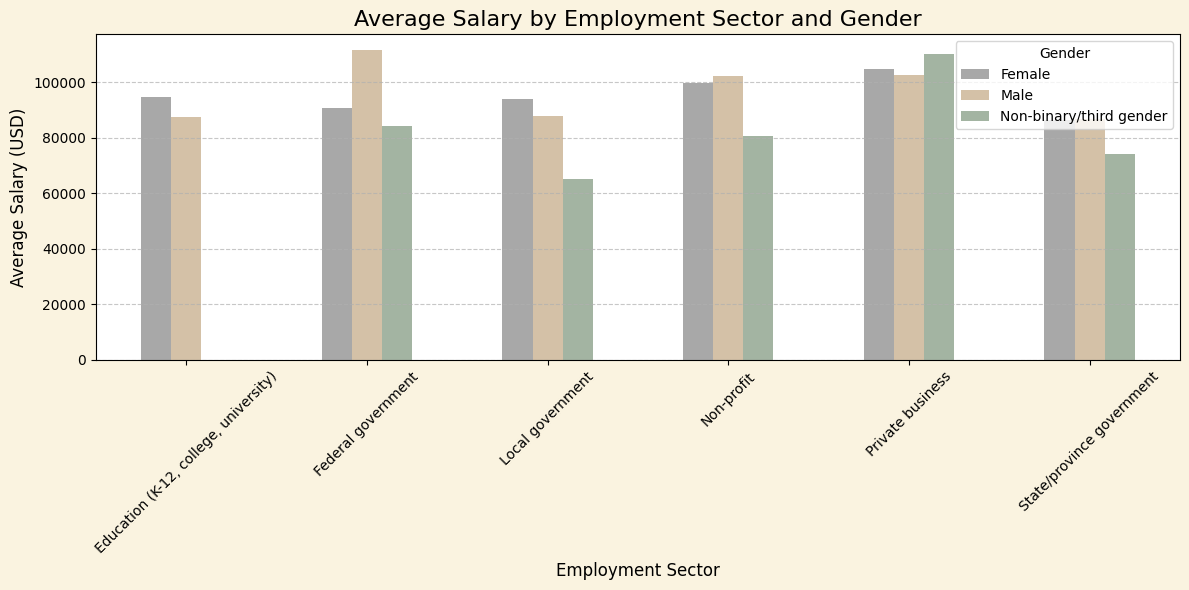

In [4]:
df_clean.info()

# Ensure that the SalaryUSD column is numeric
df_clean["SalaryUSD"] = pd.to_numeric(df_clean["SalaryUSD"], errors="coerce")

# Filter data to include only Male, Female, and Non-binary/third gender
filtered_data = df_clean[df_clean["Gender"].isin(["Male", "Female", "Non-binary/third gender"])]

# Calculate the average salary for each gender within different employment sectors
sector_gender_avg_salary = filtered_data.groupby(["EmploymentSector", "Gender"])["SalaryUSD"].mean().unstack()

# Print the table
print(sector_gender_avg_salary)

# Visualize the results
plt.figure(figsize=(12, 6))
sector_gender_avg_salary.plot(kind="bar", figsize=(12, 6), color=["#A8A8A8", "#D4C1A7", "#A3B4A2"])

# Add chart details
plt.title("Average Salary by Employment Sector and Gender", fontsize=16)
plt.xlabel("Employment Sector", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender", loc="upper right")

# Display grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [5]:
import numpy as np

# Define all possible combinations of EmploymentSector, Survey Year, ManageStaff, and Gender
employment_sectors = df_clean["EmploymentSector"].unique()
survey_years = df_clean["Survey Year"].unique()
manage_staff_status = ["Yes", "No"]
genders = ["Male", "Female"]

# Create a complete index with all possible combinations
multi_index = pd.MultiIndex.from_product(
    [employment_sectors, survey_years, manage_staff_status, genders],
    names=["EmploymentSector", "Survey Year", "ManageStaff", "Gender"]
)


# Group the data and calculate the mean salary
grouped_data = df_clean.groupby(["EmploymentSector", "Survey Year", "ManageStaff", "Gender"])["SalaryUSD"].mean().round(1).reset_index()

# Reindex the data to ensure all combinations exist, filling missing values with 0
grouped_data = grouped_data.set_index(["EmploymentSector", "Survey Year", "ManageStaff", "Gender"]).reindex(multi_index, fill_value=0).reset_index()

grouped_data

,EmploymentSector,Survey Year,ManageStaff,Gender,SalaryUSD
0,Private business,2025,Yes,Male,126376.3
1,Private business,2025,Yes,Female,133884.6
2,Private business,2025,No,Male,115530.3
3,Private business,2025,No,Female,121264.4
4,Private business,2024,Yes,Male,144551.7
...,...,...,...,...,...
211,"Education (K-12, college, university)",2018,No,Female,82392.9
212,"Education (K-12, college, university)",2017,Yes,Male,0.0
213,"Education (K-12, college, university)",2017,Yes,Female,0.0
214,"Education (K-12, college, university)",2017,No,Male,0.0


In [6]:
# Convert 'Survey Year' to datetime format for proper time series handling
grouped_data["Survey Year"] = pd.to_datetime(grouped_data["Survey Year"], format="%Y")

# Prepare the dataset for time series forecasting
df_time_series = grouped_data.groupby(["Survey Year", "Gender"])["SalaryUSD"].mean().unstack()

# Ensure the index is a proper DatetimeIndex
df_time_series.index = pd.to_datetime(df_time_series.index, format="%Y")

# Fit an ARIMA model for each gender and forecast for the next 5 years
forecast_results = {}
model_order = (1, 1, 1)  # Lower order to avoid overfitting due to small dataset

for gender in df_time_series.columns:
    model = sm.tsa.ARIMA(df_time_series[gender].dropna(), order=model_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)  # Forecast for the next 5 years
    forecast_results[gender] = forecast

forecast_results


C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

{'Female': 2026-01-01    79559.396473
 2027-01-01    76155.731017
 2028-01-01    73143.672852
 2029-01-01    70478.165766
 2030-01-01    68119.337471
 Freq: YS-JAN, Name: predicted_mean, dtype: float64,
 'Male': 2026-01-01    118095.321332
 2027-01-01    109310.450002
 2028-01-01    118095.321331
 2029-01-01    109310.450003
 2030-01-01    118095.321329
 Freq: YS-JAN, Name: predicted_mean, dtype: float64}

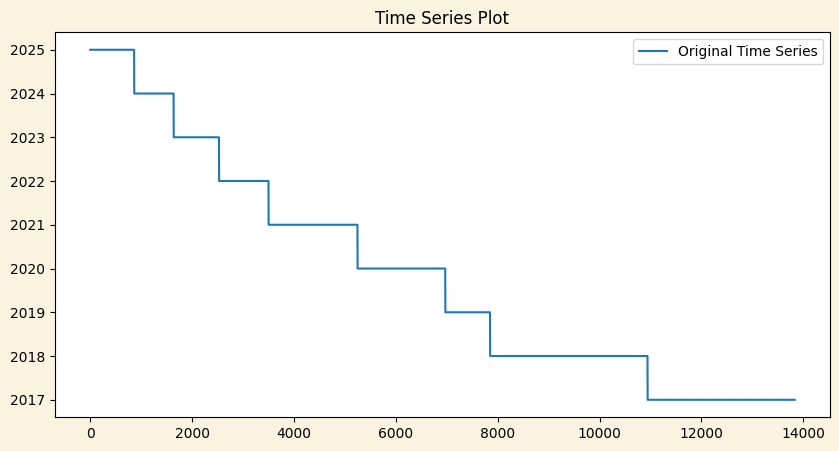

ADF Test Result:
ADF quantity: -1.8557992145911468
p value: 0.3531314865388855
threshold value:
   1%: -3.4308228538156396
   5%: -2.8617489796349824
   10%: -2.5668812350404724
The data is non-stationary and may require differencing.


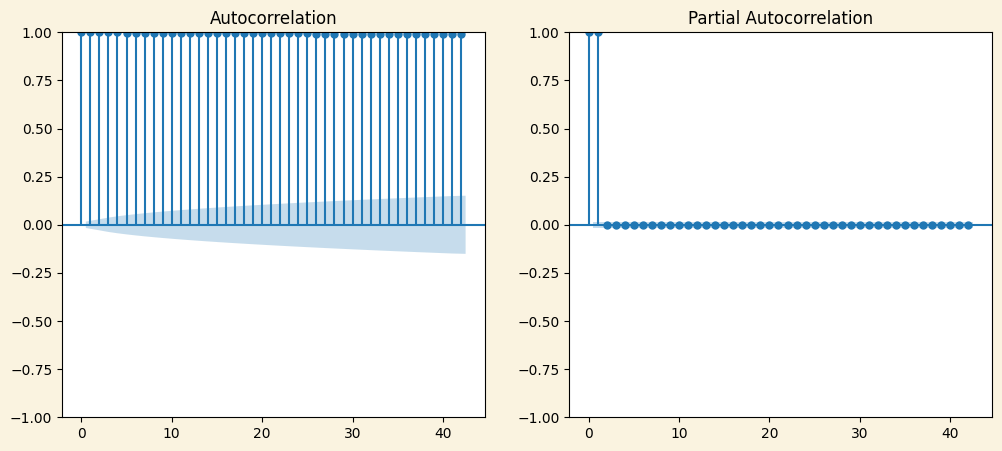

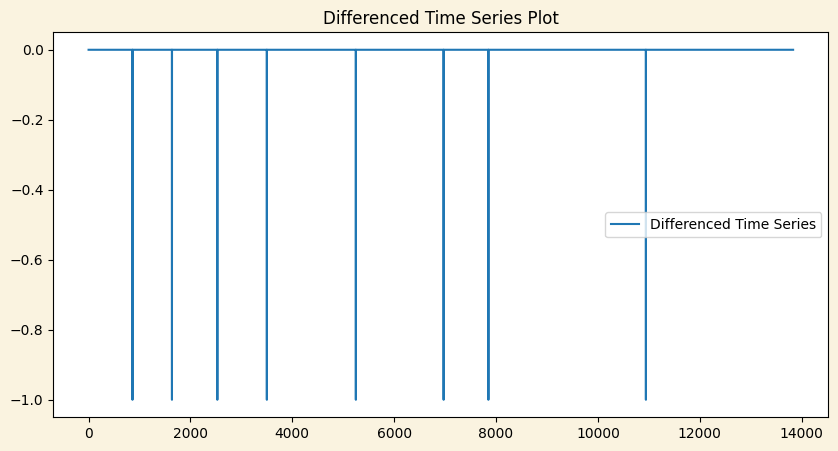

ADF Test Result after Differencing
ADF quantity: -117.66484697758965
p value: 0.0
threshold value:
   1%: -3.430822888009958
   5%: -2.861748994746095
   10%: -2.566881243083978
The data is stationary and can use ARIMA after differencing


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Do the test on the data base to see if it's suite for ARIMA analysis
df = df_time_series

# set the time series
time_series = df_clean["Survey Year"]

# plot Time Series Plot
plt.figure(figsize=(10,5))
plt.plot(time_series, label="Original Time Series")
plt.title("Time Series Plot")
plt.legend()
plt.show()

# 2. ADF test
adf_result = adfuller(time_series.dropna())
print("ADF Test Result:")
print(f"ADF quantity: {adf_result[0]}")
print(f"p value: {adf_result[1]}")
print("threshold value:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")
if adf_result[1] < 0.05:
    print("The data is stationary and can use ARIMA.")
else:
    print("The data is non-stationary and may require differencing.")

# 3. ACF and PACF plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(time_series.dropna(), ax=axes[0])
plot_pacf(time_series.dropna(), ax=axes[1])
plt.show()


diff_series = time_series.diff().dropna()
plt.figure(figsize=(10,5))
plt.plot(diff_series, label="Differenced Time Series")
plt.title("Differenced Time Series Plot")
plt.legend()
plt.show()

# test ADF again
diff_adf_result = adfuller(diff_series)
print("ADF Test Result after Differencing")
print(f"ADF quantity: {diff_adf_result[0]}")
print(f"p value: {diff_adf_result[1]}")
print("threshold value:")
for key, value in diff_adf_result[4].items():
    print(f"   {key}: {value}")
if diff_adf_result[1] < 0.05:
    print("The data is stationary and can use ARIMA after differencing")
else:
    print("The data is still non-stationary and may require further differencing.")


In [8]:
import pandas as pd
import statsmodels.api as sm


# Step 2: Prepare the dataset for time series forecasting
df_time_series2 = grouped_data.groupby(
    ["Survey Year", "EmploymentSector", "ManageStaff", "Gender"]
)["SalaryUSD"].mean().reset_index()

# Step 3: Fit an ARIMA model for each combination and forecast for the next 5 years
forecast_results = {}
model_order = (0, 1, 0)  # Simpler ARIMA model

# Iterate over unique combinations of EmploymentSector, ManageStaff, and Gender
for (sector, manage, gender), sub_df in df_time_series2.groupby(["EmploymentSector", "ManageStaff", "Gender"]):
    sub_series = sub_df.set_index("Survey Year")["SalaryUSD"]
    sub_series.index = pd.date_range(start=sub_series.index.min(), end=sub_series.index.max(), freq="YS")
    
    if sub_series.dropna().shape[0] > 2:  # Ensure enough data points
        try:
            model = sm.tsa.ARIMA(sub_series, order=(1, 1, 1)).fit()
            forecast_years = pd.date_range(start=sub_series.index.max() + pd.DateOffset(years=1), periods=5, freq="YS")
            forecast = model.forecast(steps=5)
            forecast_results[(sector, manage, gender)] = pd.Series(forecast, index=forecast_years)
        except Exception as e:
            print(f"Error for {sector}, {manage}, {gender}: {e}")
    else:
        print(f"Not enough data for {sector}, {manage}, {gender}")

#Step 4: Convert forecast results to a DataFrame
forecast_df = pd.DataFrame.from_dict(forecast_results, orient="index").reset_index()
forecast_df.columns = ["EmploymentSector", "ManageStaff", "Gender"] + [f"Year_{i+1}" for i in range(5)]

# Replace missing values with a placeholder
forecast_df.fillna("No data", inplace=True)

# Display the forecast DataFrame
forecast_df


C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters f

,EmploymentSector,ManageStaff,Gender,Year_1,Year_2,Year_3,Year_4,Year_5
0,"Education (K-12, college, university)",No,Female,119798.637329,124800.940194,122218.760337,123551.676994,122863.627782
1,"Education (K-12, college, university)",No,Male,114659.064967,98042.800038,114659.064929,98042.800076,114659.064891
2,"Education (K-12, college, university)",Yes,Female,45980.041698,43331.684031,43484.224091,43475.438092,43475.944147
3,"Education (K-12, college, university)",Yes,Male,96921.660990,96927.221962,96932.782916,96938.343854,96943.904773
4,Federal government,No,Female,67419.072058,66759.522215,66755.281602,66755.254337,66755.254162
5,Federal government,No,Male,138527.453013,111286.400001,138527.453011,111286.400003,138527.453010
6,Federal government,Yes,Female,28309.859218,22799.578414,23872.109164,23663.349892,23703.983164
7,Federal government,Yes,Male,96920.475913,90252.930391,86483.613906,84352.732801,83148.096815
8,Local government,No,Female,143221.044145,144066.421008,143766.011045,143872.763607,143834.828415
9,Local government,No,Male,119269.959434,121957.025376,120223.554461,121341.845369,120620.417311


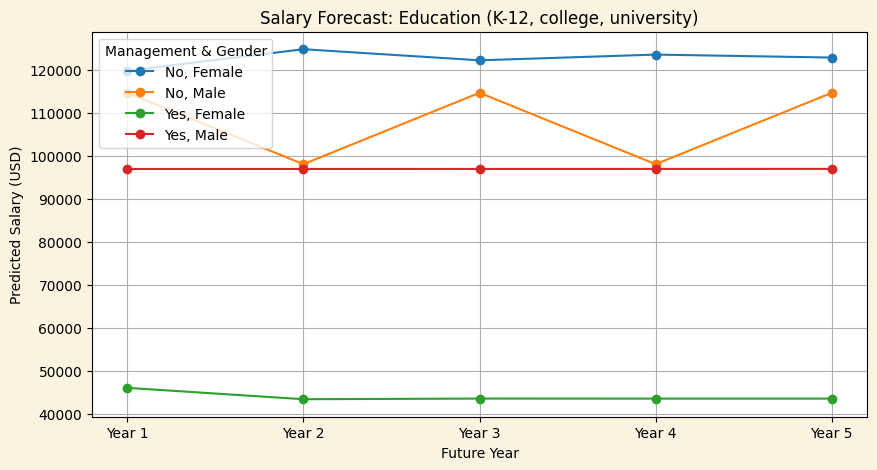

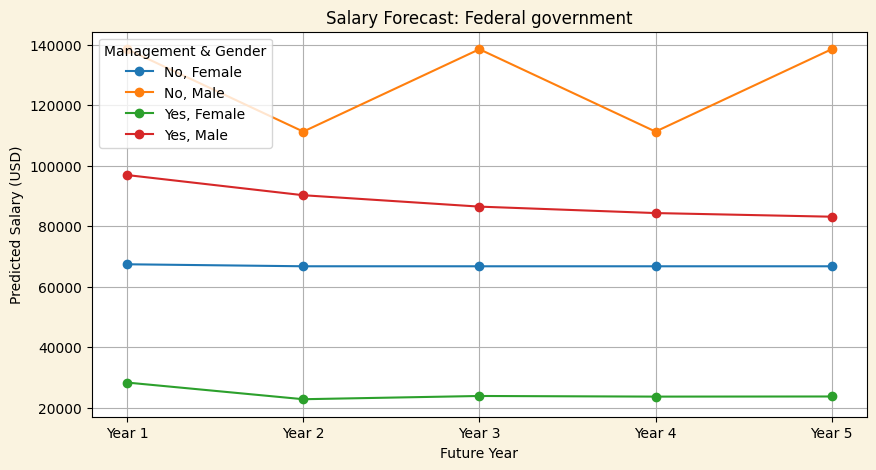

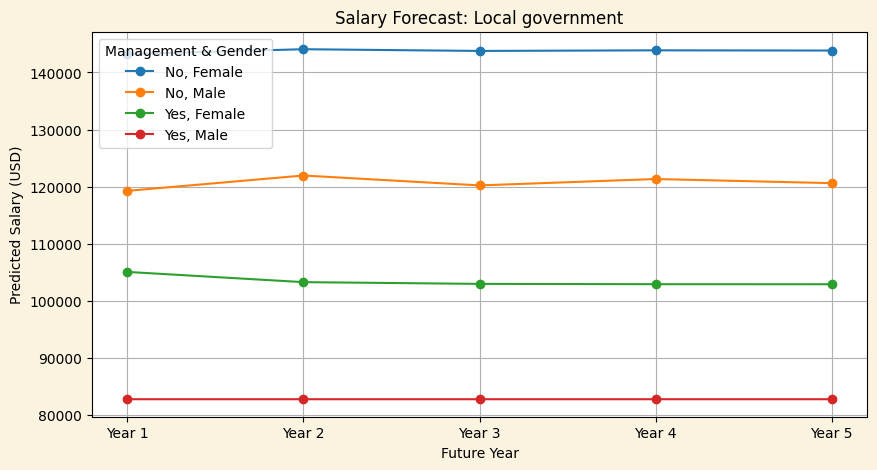

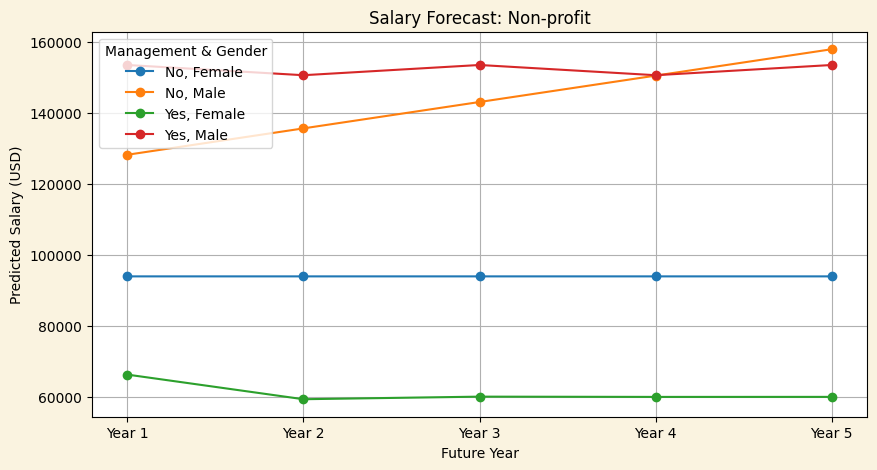

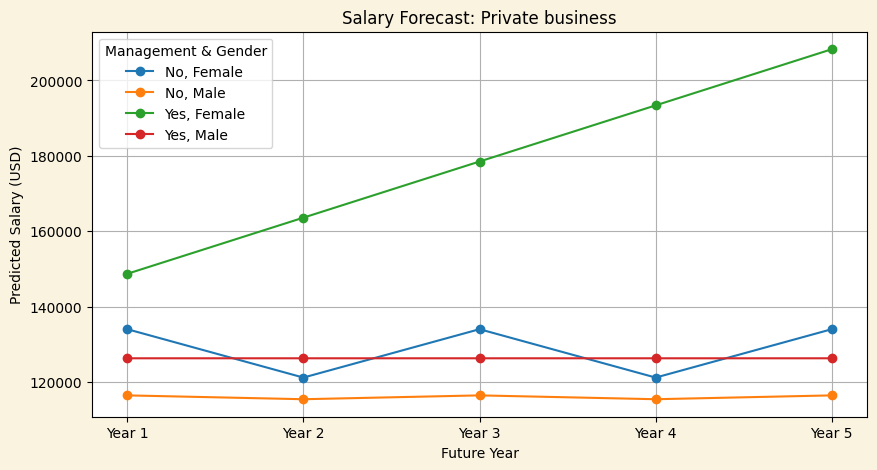

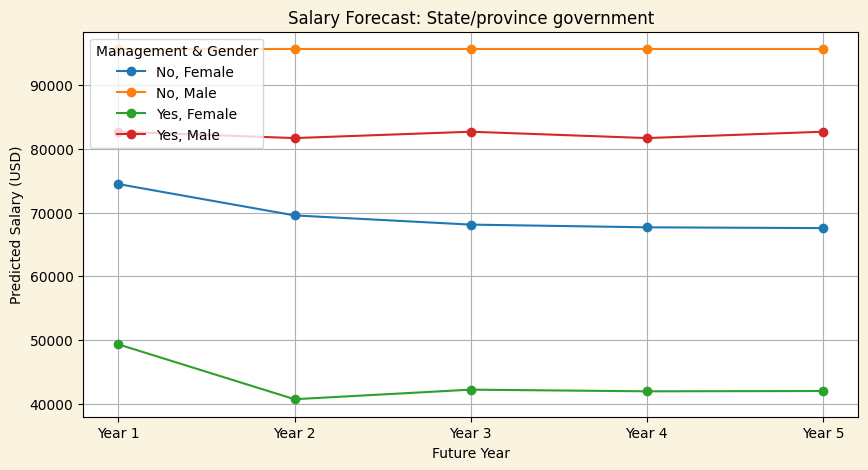

In [12]:
import matplotlib.pyplot as plt

# 转换年份列为数值型
years = ["Year_1", "Year_2", "Year_3", "Year_4", "Year_5"]
forecast_df_melted = forecast_df.melt(id_vars=["EmploymentSector", "ManageStaff", "Gender"], 
                                      value_vars=years, 
                                      var_name="Year", 
                                      value_name="SalaryUSD")

# 统一年份格式
forecast_df_melted["Year"] = forecast_df_melted["Year"].str.extract("(\d+)").astype(int)

# 获取唯一的就业行业列表
unique_sectors = forecast_df_melted["EmploymentSector"].unique()

# 为每个行业单独绘制预测趋势图
for sector in unique_sectors:
    plt.figure(figsize=(10, 5))
    sector_data = forecast_df_melted[forecast_df_melted["EmploymentSector"] == sector]
    
    for (manage, gender), sub_df in sector_data.groupby(["ManageStaff", "Gender"]):
        plt.plot(sub_df["Year"], sub_df["SalaryUSD"], marker="o", label=f"{manage}, {gender}")

    plt.xlabel("Future Year")
    plt.ylabel("Predicted Salary (USD)")
    plt.title(f"Salary Forecast: {sector}")
    plt.legend(title="Management & Gender", loc="upper left")
    plt.grid(True)
    plt.xticks(range(1, 6), labels=[f"Year {i}" for i in range(1, 6)])
    plt.show()
